<a href="https://colab.research.google.com/github/chaeun6-cmd/New-repository/blob/main/%ED%94%84%EB%A1%9C%EC%A0%9D%ED%8A%B8_02_19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Day 1 Project: 신용거래 이상탐지 데이터 다루기

In [12]:
import sys
sys.path.append('./src')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#데이터 불러오기
data = pd.read_csv("/content/fraud.csv",on_bad_lines= "skip")

/tmp/ipython-input-3584684381.py:10: DtypeWarning: Columns (1,4,11,12,13,14,19,20) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("/content/fraud.csv",on_bad_lines= "skip")


#1. 데이터 구조 및 타입 확인

In [13]:
#데이터 구조 요약
data.info()

#결측치 확인
data.isnull().sum()

#통계 요약
data.describe()

#데이터 분석
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1352314 entries, 0 to 1352313
Data columns (total 22 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   trans_date_trans_time  1352314 non-null  object 
 1   cc_num                 1352314 non-null  object 
 2   merchant               1352311 non-null  object 
 3   category               1352311 non-null  object 
 4   amt                    1352309 non-null  object 
 5   first                  1352308 non-null  object 
 6   last                   1352302 non-null  object 
 7   gender                 1352291 non-null  object 
 8   street                 1352286 non-null  object 
 9   city                   1352278 non-null  object 
 10  state                  1352266 non-null  object 
 11  zip                    1352253 non-null  object 
 12  lat                    1352251 non-null  object 
 13  long                   1352241 non-null  object 
 14  city_pop          

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1.325376e+09,49.159047,-118.186462,0.0
1,2019-01-01 00:12:34,4956828990005111019,"fraud_Schultz, Simonis and Little",grocery_pos,44.71,Kenneth,Robinson,M,269 Sanchez Rapids,Elizabeth,...,40.6747,-74.2239,124967,Operational researcher,1980-12-21,09eff9c806365e2a6be12c1bbab3d70e,1.325377e+09,40.079588,-74.848087,0.0
2,2019-01-01 00:17:16,180048185037117,fraud_Kling-Grant,grocery_net,46.28,Mary,Wall,F,2481 Mills Lock,Plainfield,...,40.6152,-74.415,71485,Leisure centre manager,1974-07-19,19e23c6a300c774354417befe4f31f8c,1.325377e+09,40.021888,-74.228188,0.0
3,2019-01-01 00:20:15,374930071163758,fraud_Deckow-O'Conner,grocery_pos,64.09,Daniel,Escobar,M,61390 Hayes Port,Romulus,...,42.2203,-83.3583,31515,Police officer,1971-11-05,6f363661ba6b55889e488dd178f2a0af,1.325377e+09,42.360426,-83.552316,0.0
4,2019-01-01 00:23:41,2712209726293386,fraud_Balistreri-Nader,misc_pos,25.58,Jenna,Brooks,F,50872 Alex Plain Suite 088,Baton Rouge,...,30.4066,-91.1468,378909,"Designer, furniture",1977-02-22,1654da2abfb9e79a5f99167fc9779558,1.325377e+09,29.737426,-90.853194,0.0


In [14]:
data.tail()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
1352309,2020-12-31 23:56:48,6011109736646996,fraud_Botsford and Sons,home,134.26,Rebecca,Erickson,F,594 Berry Lights Apt. 392,Wilmington,...,34.2651,-77.867,186140,English as a second language teacher,1983-02-08,fc860b0d1f89b0b068c9c8db27b6bcc5,1.388534e+09,34.853497,-78.664158,0.0
1352310,2020-12-31 23:56:57,213112402583773,"fraud_Baumbach, Hodkiewicz and Walsh",shopping_pos,25.49,Ana,Howell,F,4664 Sanchez Common Suite 930,Bradley,...,34.0326,-82.2027,1523,Research scientist (physical sciences),1984-06-03,0f0c38fe781b317f733b845c0d6ba448,1.388534e+09,35.008839,-81.475156,0.0
1352311,2020-12-31 23:59:09,3556613125071656,fraud_Hoppe-Parisian,kids_pets,111.84,Jose,Vasquez,M,572 Davis Mountains,Lake Jackson,...,29.0393,-95.4401,28739,Futures trader,1999-12-27,2090647dac2c89a1d86c514c427f5b91,1.388534e+09,29.661049,-96.186633,0.0
1352312,2020-12-31 23:59:15,6011724471098086,fraud_Rau-Robel,kids_pets,86.88,Ann,Lawson,F,144 Evans Islands Apt. 683,Burbank,...,46.1966,-118.9017,3684,Musician,1981-11-29,6c5b7c8add471975aa0fec023b2e8408,1.388534e+09,46.65834,-119.715054,0.0
1352313,2020-12-31 23:59:34,4170689372027579,fraud_Dare-Marvin,entertainment,38.13,Samuel,Frey,M,830 Myers Plaza Apt. 384,Edmond,...,35.6665,-97.4798,116001,Media buyer,1993-05-10,1765bb45b3aa3224b4cdcb6e7a96cee3,1.388534e+09,36.210097,-97.036372,0.0


컬럼 약 22개, 데이터 약 1344248개를 확인할 수 있었다.

| 컬럼명                       | 의미                             |
| ------------------------- | ------------------------------ |
| **trans_date_trans_time** | 거래 발생 날짜 및 시간                  |
| **cc_num**                | 신용카드 번호                        |
| **merchant**              | 가맹점 이름                         |
| **category**              | 가맹점 업종 카테고리                    |
| **amt**                   | 거래 금액 (amount)                 |
| **first**                 | 고객 이름 (이름)                     |
| **last**                  | 고객 성 (성씨)                      |
| **gender**                | 성별                             |
| **street**                | 고객 주소 (도로명)                    |
| **city**                  | 고객 거주 도시                       |
| **lat**                   | 고객 위치 위도 (latitude)            |
| **long**                  | 고객 위치 경도 (longitude)           |
| **city_pop**              | 해당 도시 인구 수                     |
| **job**                   | 고객 직업                          |
| **dob**                   | 생년월일 (date of birth)           |
| **trans_num**             | 거래 고유 번호                       |
| **unix_time**             | 거래 시각 (유닉스 타임스탬프  형식, 초 단위 시간값) |  - 수치형
| **merch_lat**             | 가맹점 위도                         |
| **merch_long**            | 가맹점 경도                         |
| **is_fraud**              | 사기 거래 여부 (보통 0 = 정상, 1 = 사기)   |



1. cc_num :신용카드 번호 (불필요)
2. first : 고객 이름(불필요)
3. last: 고객 성씨(불필요)
4. gender: 성별(불필요)
5. street: 고객 주소(불필요)
6. city: 고객 거주 도시(불필요)
7. trans_num: 거래 고유 번호(불필요)

In [24]:
#컬럼 제거
drop_data= ['cc_num', 'first', 'last', 'gender' 'street','city' 'trans_num']

#컬럼 삭제 확인
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1352314 entries, 0 to 1352313
Data columns (total 22 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   trans_date_trans_time  1352314 non-null  object 
 1   cc_num                 1352314 non-null  object 
 2   merchant               1352311 non-null  object 
 3   category               1352311 non-null  object 
 4   amt                    1352309 non-null  object 
 5   first                  1352308 non-null  object 
 6   last                   1352302 non-null  object 
 7   gender                 1352291 non-null  object 
 8   street                 1352286 non-null  object 
 9   city                   1352278 non-null  object 
 10  state                  1352266 non-null  object 
 11  zip                    1352253 non-null  object 
 12  lat                    1352251 non-null  object 
 13  long                   1352241 non-null  object 
 14  city_pop          

In [23]:
#사기 거래 여부 데이터 불균형 확인
data["is_fraud"].value_counts()

,count
is_fraud,
0.0,1348843
1.0,3323


In [26]:
pd.crosstab(data["category"], data["is_fraud"])


is_fraud,0.0,1.0
category,,
entertainment,92461,137
food_dining,98808,168
gas_transport,126447,272
grocery_net,67310,24
grocery_pos,116903,585
health_fitness,86413,110
home,118964,202
kids_pets,110852,175
misc_net,69067,289


In [17]:
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

print("숫자형:", numeric_cols)
print("범주형:", categorical_cols)

숫자형: ['unix_time', 'is_fraud']
범주형: ['trans_date_trans_time', 'cc_num', 'merchant', 'category', 'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip', 'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'merch_lat', 'merch_long']


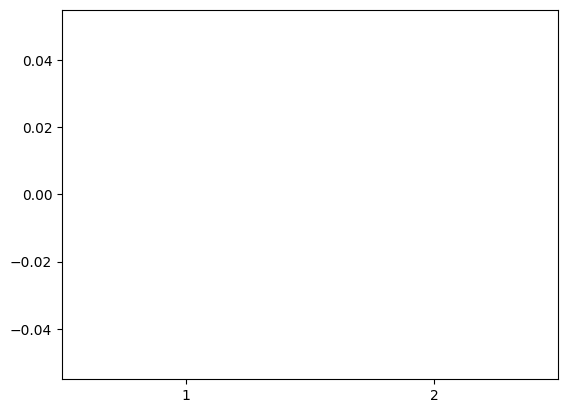

In [18]:
import matplotlib.pyplot as plt

plt.figure()

plt.boxplot(df.select_dtypes(include=['int64','float64']))
plt.show()
